# Unsupervised Learning with K-means and EM for Dog Breed Data Clustering

Author: S M Abdullah ferdous

Module:Data Mining and visualisation

Topic: Kmeans dog breed data cklustering

University of Aberdeen ,2020

In [0]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.mixture import GaussianMixture
#from sklearn.mixture import GMM
from sklearn import mixture
%matplotlib inline
warnings.filterwarnings("ignore")
np.random.seed(31415) 

In [66]:
#File upload
from google.colab import files
files.upload()

Saving DMV_CS551G_Assessment1_Task1_dataset.csv to DMV_CS551G_Assessment1_Task1_dataset (2).csv


{'DMV_CS551G_Assessment1_Task1_dataset.csv': b'height,tail length,leg length,nose circumference\r\n5.151,3.535,1.414,0.202\r\n4.949,3.03,1.414,0.202\r\n4.747,3.232,1.313,0.202\r\n4.646,3.131,1.515,0.202\r\n5.05,3.636,1.414,0.202\r\n5.454,3.939,1.717,0.404\r\n4.646,3.434,1.414,0.303\r\n5.05,3.434,1.515,0.202\r\n4.444,2.929,1.414,0.202\r\n4.949,3.131,1.515,0.101\r\n5.454,3.737,1.515,0.202\r\n4.848,3.434,1.616,0.202\r\n4.848,3.03,1.414,0.101\r\n4.343,3.03,1.111,0.101\r\n5.858,4.04,1.212,0.202\r\n5.757,4.444,1.515,0.404\r\n5.454,3.939,1.313,0.404\r\n5.151,3.535,1.414,0.303\r\n5.757,3.838,1.717,0.303\r\n5.151,3.838,1.515,0.303\r\n5.454,3.434,1.717,0.202\r\n5.151,3.737,1.515,0.404\r\n4.646,3.636,1.01,0.202\r\n5.151,3.333,1.717,0.505\r\n4.848,3.434,1.919,0.202\r\n5.05,3.03,1.616,0.202\r\n5.05,3.434,1.616,0.404\r\n5.252,3.535,1.515,0.202\r\n5.252,3.434,1.414,0.202\r\n4.747,3.232,1.616,0.202\r\n4.848,3.131,1.616,0.202\r\n5.454,3.434,1.515,0.404\r\n5.252,4.141,1.515,0.101\r\n5.555,4.242,1.414,0.

## import dataset

In [67]:
#imporing the dataset with pandas daraframe
df = pd.read_csv('DMV_CS551G_Assessment1_Task1_dataset.csv')
#df = pd.read_csv('kmeans.csv')
#printing the first five rows of the dataset
df.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


## Exploratory data analysis (EDA) 

In [68]:
#checking the type of data set
type(df)

pandas.core.frame.DataFrame

In [69]:
#Checking for empty values
print ("Empty values: {}.".format(df.isnull().values.any()))

Empty values: False.


In [70]:
#we can also check for null values like this
df.isnull().sum()

height                0
tail length           0
leg length            0
nose circumference    0
dtype: int64

In [71]:
#getting various information about the dataset.Such as Mean,Average,STD
df.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


In [72]:
#checking percentile of the the features
print("percentile for the feature Height :",np.percentile(df['height'], 75))
print("percentile for the feature tail lenght :",np.percentile(df['tail length'], 75))
print("percentile for the feature leg length :",np.percentile(df['leg length'], 75))
print("percentile for the feature nose circumference :",np.percentile(df['nose circumference'], 75))


percentile for the feature Height : 6.528
percentile for the feature tail lenght : 3.366
percentile for the feature leg length : 5.202000000000001
percentile for the feature nose circumference : 1.8359999999999999


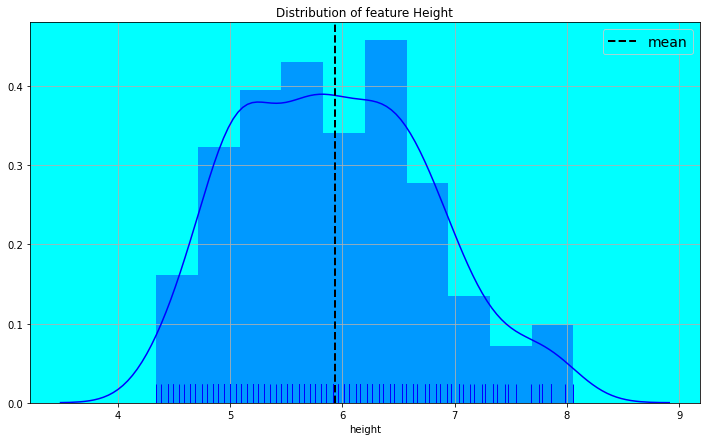

In [73]:
#checking the distribution of the t labels
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.distplot(df["height"],color="b",rug=True)
plt.axvline(df["height"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of feature Height")
plt.grid()
plt.show()

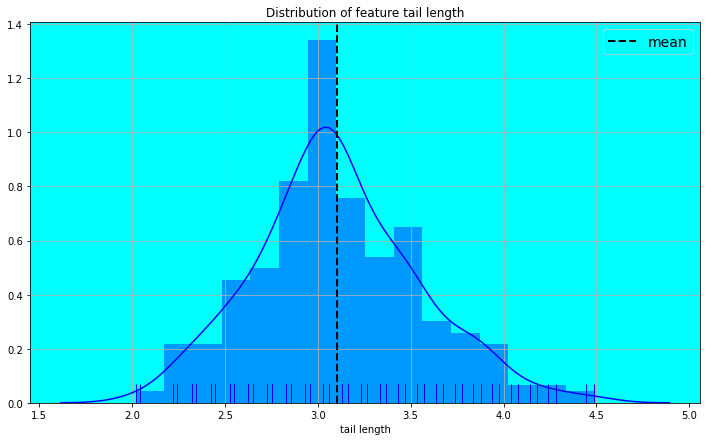

In [74]:
#checking the distribution of the  labels
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.distplot(df["tail length"],color="b",rug=True)
plt.axvline(df["tail length"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of feature tail length")
plt.grid()
plt.show()

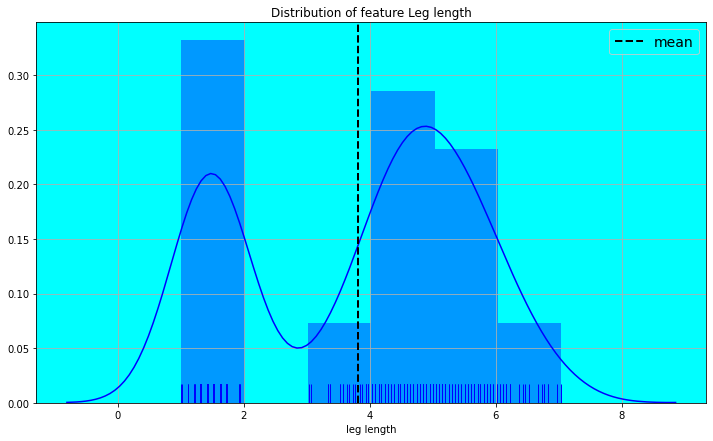

In [75]:
#checking the distribution of the  labels
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.distplot(df["leg length"],color="b",rug=True)
plt.axvline(df["leg length"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of feature Leg length")
plt.grid()
plt.show()

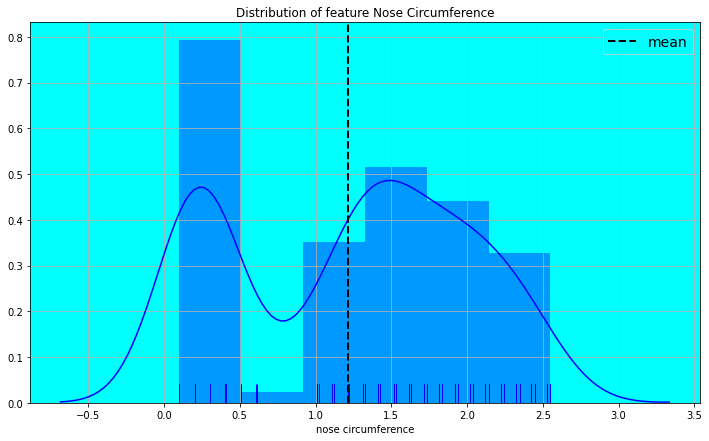

In [76]:
#checking the distribution of the  labels
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.distplot(df["nose circumference"],color="b",rug=True)
plt.axvline(df["nose circumference"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of feature Nose Circumference")
plt.grid()
plt.show()

### Checking for ouliers in the dataset

In [77]:
#we can calcuate the ouliers for the dataset
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

,No. of Outliers,Percentage Outliers
height,0,0.0
tail length,6,2.0
leg length,0,0.0
nose circumference,0,0.0


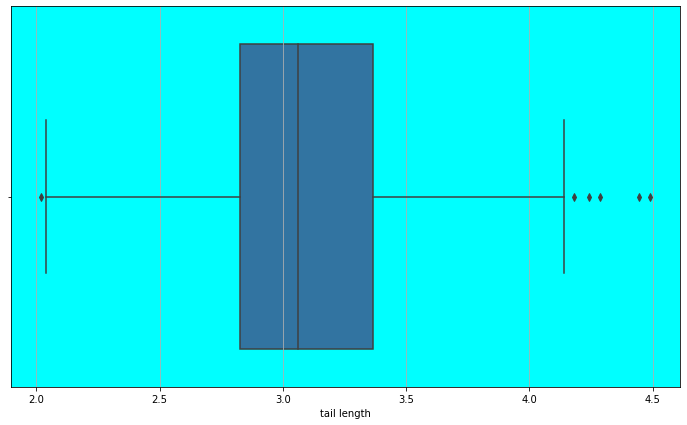

In [78]:
#Visualise the outliers in tail length
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.grid()
sns.boxplot(x=df['tail length'])

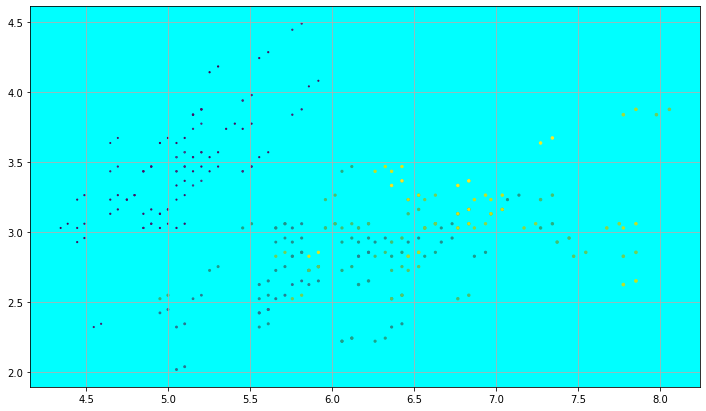

In [79]:
#we can also visualise ouliers like this

plt.rcParams['axes.facecolor'] = 'aqua'
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['height'], df['tail length'],df['leg length'],df['nose circumference'])
plt.grid()
plt.show()

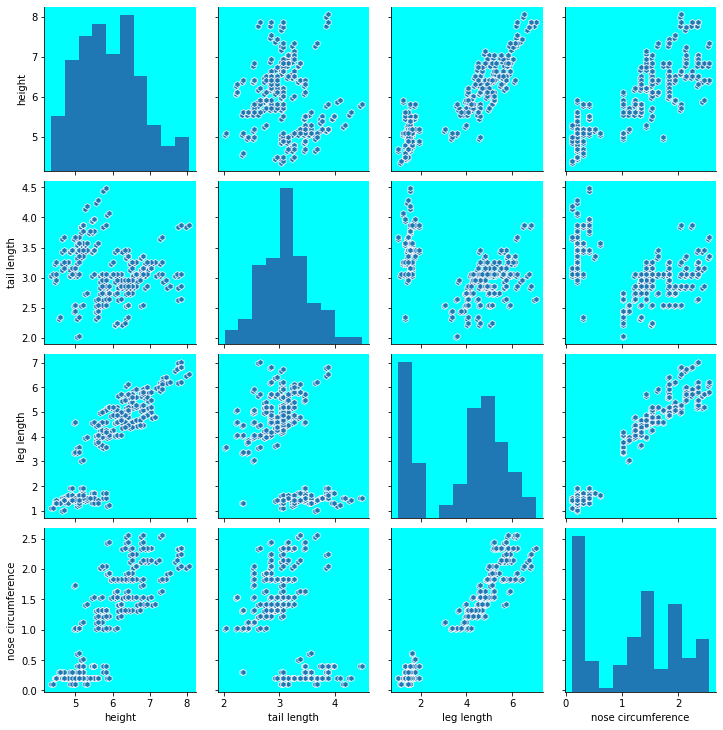

In [80]:
#we can see the relationship between the variables
plt.rcParams['axes.facecolor'] = 'aqua'
sns.pairplot(df,markers="h")
plt.show()

## K-Means Clustering

#### Using k value of 3

In [0]:
np.random.seed(31415)
x = df.iloc[:, [0,1,2,3]].values
Kmeans3=KMeans(n_clusters=3)
model3=Kmeans3.fit_predict(x)
#print(model3)

In [82]:
Kmeans3.n_iter_

6

In [83]:
Kmeans3.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
Kmeans3.cluster_centers_

array([[5.98078862, 2.7857561 , 4.45673171, 1.45560163],
       [5.08109   , 3.47942   , 1.48393   , 0.24969   ],
       [6.95518182, 3.12166234, 5.81480519, 2.09336364]])

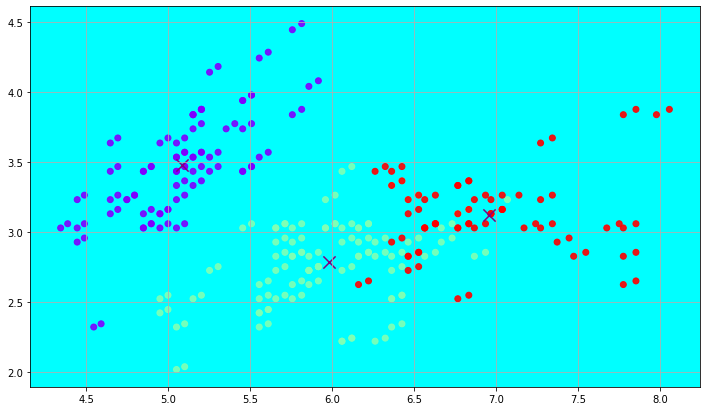

In [85]:
#plt.figure(figsize=(8,6))
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.scatter(x[:,0],x[:,1],c=model3,cmap='rainbow',alpha=0.9)
plt.grid()
# plot the centroids
plt.scatter(
    Kmeans3.cluster_centers_[:, 0], Kmeans3.cluster_centers_[:, 1],
    s=150, marker='x',
    c='purple', edgecolor='black',
    alpha=1.0,
    label='centroids',
)

##### 3d Visuallisation

Text(0.5, 0.92, 'K Means 3D Visualisation')

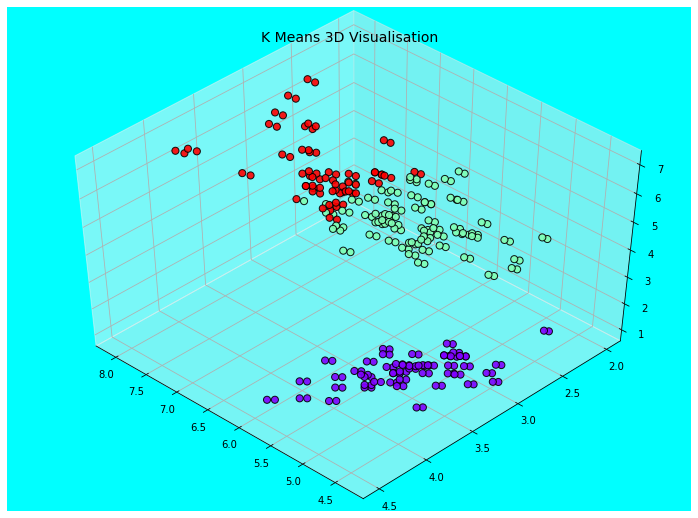

In [86]:
#labels = model3
fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],x[:, 3],c=model3,cmap='rainbow',alpha=0.9, edgecolor="k", s=50)
plt.title("K Means 3D Visualisation", fontsize=14)


#### using k value of 4

In [0]:
np.random.seed(31415)
x = df.iloc[:, [0,1,2,3]].values
Kmeans5=KMeans(n_clusters=4)
model5=Kmeans5.fit_predict(x)
#print(model5)

In [88]:
Kmeans5.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
Kmeans5.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

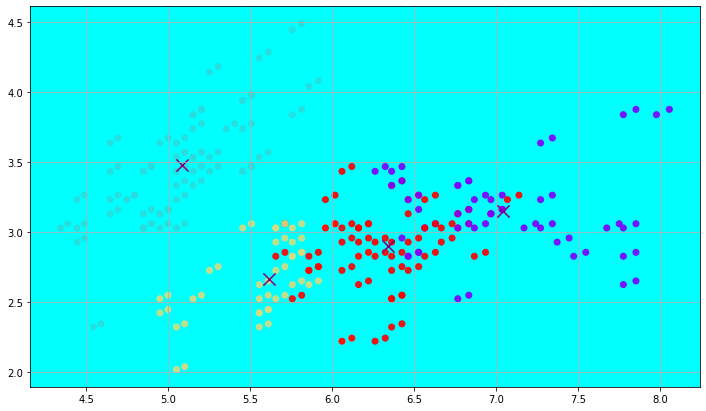

In [90]:
#plt.figure(figsize=(8,6))
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.scatter(x[:,0],x[:,1],c=model5,cmap='rainbow',alpha=0.9)
plt.grid()

# plot the centroids
plt.scatter(
    Kmeans5.cluster_centers_[:, 0], Kmeans5.cluster_centers_[:, 1],
    s=150, marker='x',
    c='purple', edgecolor='black',
    alpha=1.0,
    label='centroids',
)

##### 3D Visualisation

Text(0.5, 0.92, 'K-Means 3D Visualisation')

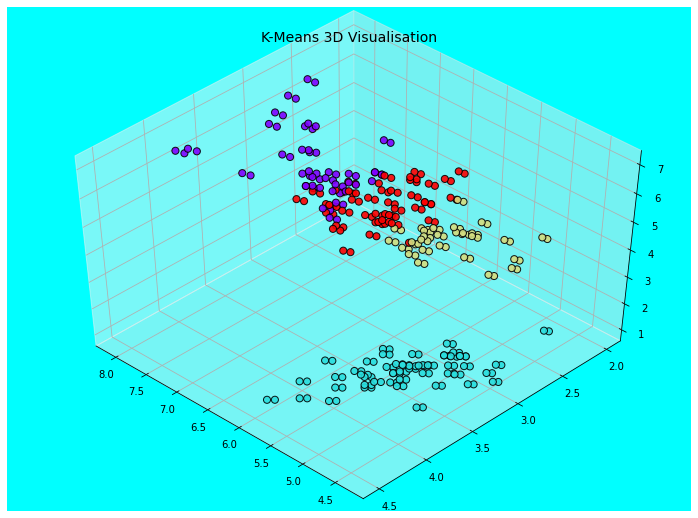

In [91]:
fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],x[:, 3],c=model5,cmap='rainbow',alpha=0.9, edgecolor="k", s=50)
plt.title("K-Means 3D Visualisation", fontsize=14)

#### find optimal k value with elbow method for K-Means

### Expectation Maximization Clustering with Gaussian Mixture

#### EM with the value of 3

In [0]:
x = df.iloc[:, [0,1,2,3]].values
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(x)
labels = gmm.predict(x)

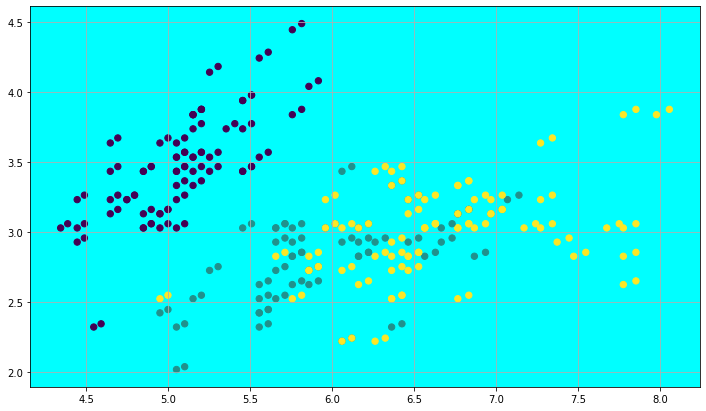

In [93]:
#plot visualisation
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');
plt.grid()

#### 3D visualisation

Text(0.5, 0.92, 'EM 3D Visualisation with the value of 3')

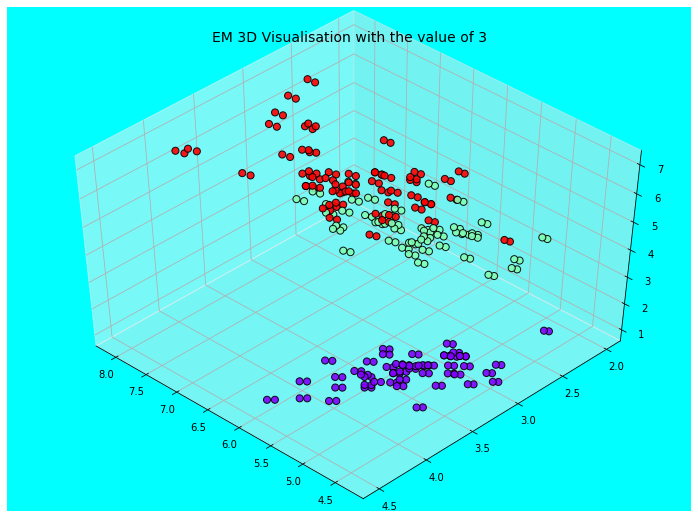

In [94]:
fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],x[:, 3],c=labels,cmap='rainbow',alpha=0.9, edgecolor="k", s=50)
plt.title("EM 3D Visualisation with the value of 3", fontsize=14)

#### EM with the value of 4

In [0]:
x = df.iloc[:, [0,1,2,3]].values
gmm5 = mixture.GaussianMixture(n_components=4)
gmm5.fit(x)
labels4 = gmm5.predict(x)

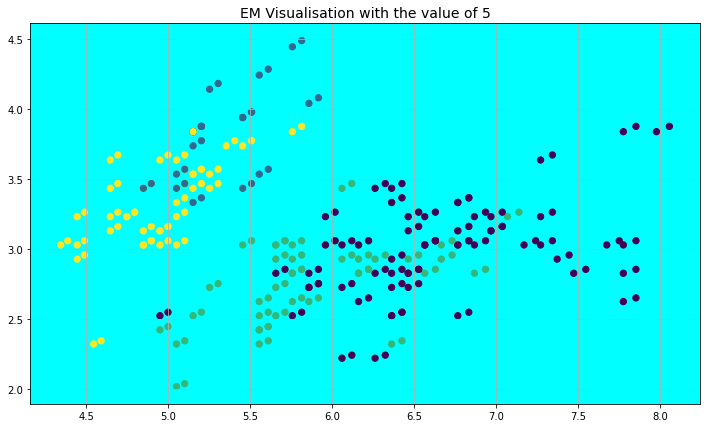

In [96]:
#plot visualisation
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.scatter(x[:, 0], x[:, 1], c=labels4, s=40, cmap='viridis');
plt.title("EM Visualisation with the value of 5", fontsize=14)
plt.grid()


Text(0.5, 0.92, 'EM 3D Visualisation with the value of 4')

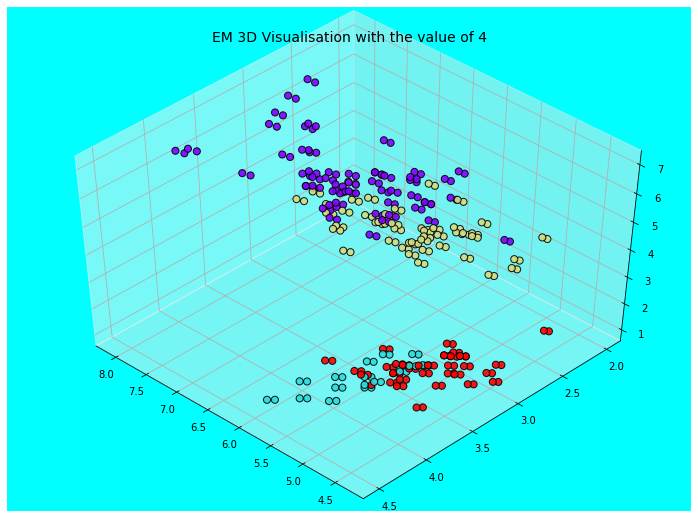

In [97]:
fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],x[:, 3],c=labels4,cmap='rainbow',alpha=0.9, edgecolor="k", s=50)
plt.title("EM 3D Visualisation with the value of 4", fontsize=14)

In [98]:
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [99]:
gmm5.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

#### Find optimal value for kmeans cluster numbers with elbow method

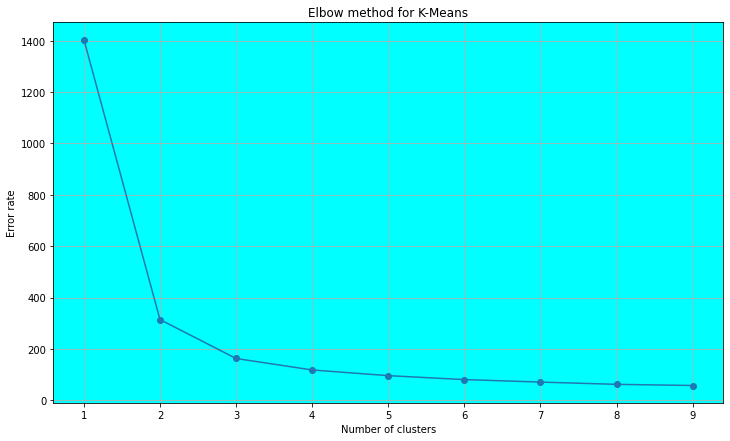

In [100]:
np.random.seed(31415)
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error,'o-')
plt.title('Elbow method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Error rate')
plt.grid()
plt.show()

### SSE with per itaration Kmeans

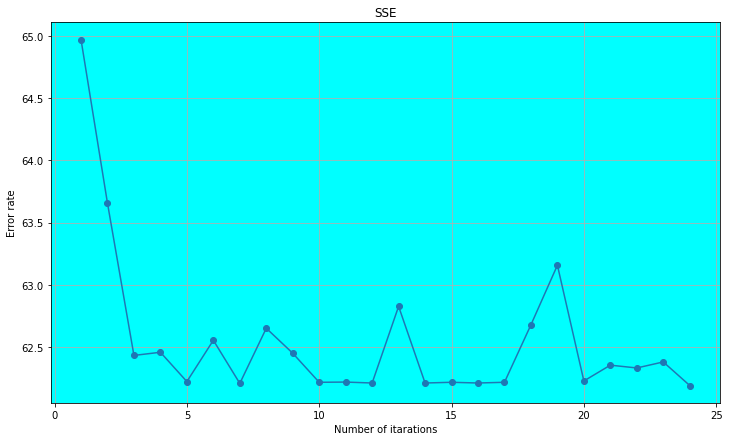

In [101]:
import matplotlib.pyplot as plt
np.random.seed(31415)
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
Error =[]
iter=Kmeans5.n_iter_
for i in range(1,25 ):
    kmeans = KMeans(max_iter = i).fit(x)
    #print(kmeans.inertia_)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 25), Error,'o-')
plt.title('SSE')
plt.xlabel('Number of itarations')
plt.ylabel('Error rate')
plt.grid()
plt.show()
#print(Error)

#### Find optimal value for EM cluster numbers Bayesian information criterion  method

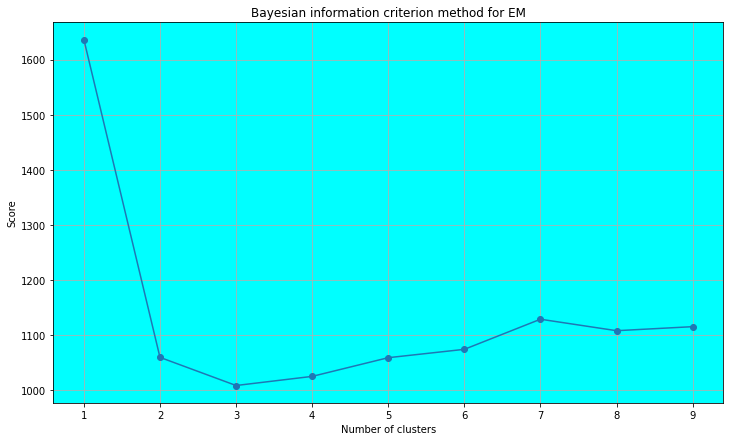

In [102]:
np.random.seed(31415)
dims = (12, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
Error =[]
for i in range(1, 10):
        gmm= mixture.GaussianMixture(n_components=i)
        gmm.fit_predict(x)
        Error.append(gmm.bic(x))
plt.plot(range(1, 10), Error,'o-')
plt.title('Bayesian information criterion method for EM')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid()
plt.show()

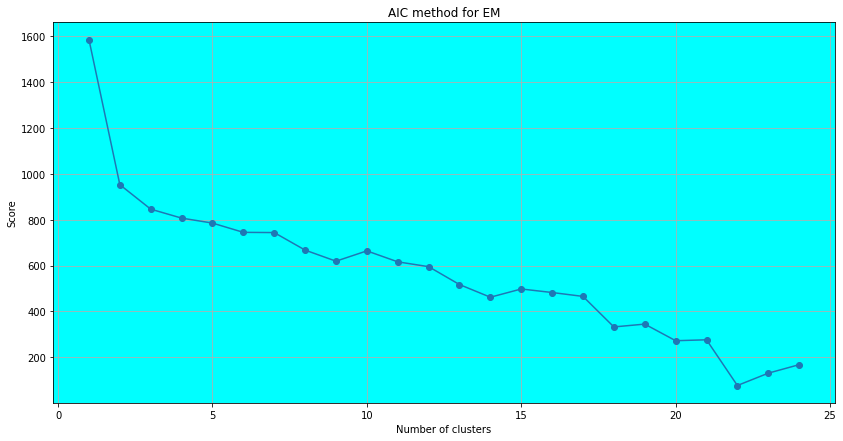

In [103]:
#checking with Aic value too
np.random.seed(31415)
dims = (14, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
Error =[]
for i in range(1, 25):
        gmm= mixture.GaussianMixture(n_components=i)
        gmm.fit_predict(x)
        Error.append(gmm.aic(x))
plt.plot(range(1, 25), Error,'o-')
plt.title('AIC method for EM')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid()
plt.show()

### numbers of updates vs itarations

No of Itaration :  0
No of Itaration :  1
No of Itaration :  2
No of Itaration :  3
No of Itaration :  4
No of Itaration :  5
No of Itaration :  6
-------------final plot-----------------
[[[5.61336364 5.61336364 5.61336364 5.61336364 5.61336364 5.61336364
   5.61336364 5.61336364]
  [5.08109    5.08109    5.08109    5.08109    5.08109    5.08109
   5.08109    5.08109   ]
  [7.04334426 7.04334426 7.04334426 7.04334426 7.04334426 7.04334426
   7.04334426 7.04334426]
  [6.34294048 6.34294048 6.34294048 6.34294048 6.34294048 6.34294048
   6.34294048 6.34294048]]

 [[2.66825455 2.66825455 2.66825455 2.66825455 2.66825455 2.66825455
   2.66825455 2.66825455]
  [3.47942    3.47942    3.47942    3.47942    3.47942    3.47942
   3.47942    3.47942   ]
  [3.15222951 3.15222951 3.15222951 3.15222951 3.15222951 3.15222951
   3.15222951 3.15222951]
  [2.90447619 2.90447619 2.90447619 2.90447619 2.90447619 2.90447619
   2.90447619 2.90447619]]

 [[4.00976364 4.00976364 4.00976364 4.00976364 4.00976

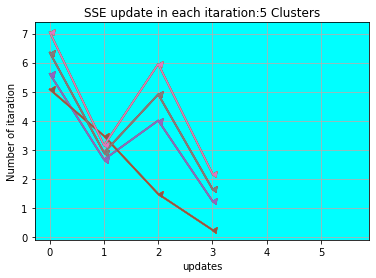

In [104]:
def sum_of_squared_distances_elements(centroids,cluster_set):
    ssd = []
    for i in cluster_set.keys():
        ssd_temp = 0
        for j in cluster_set[i]:
            ssd_temp += compute_euclidean_distance(j,centroids[i])**2
        ssd.append(ssd_temp)
    return ssd

final_cents = []
final_inert = []
rows = ["Cluster_1","Cluster_1","Cluster_1","Cluster_1","Cluster_1"]
for iter in range(Kmeans5.n_iter_):
    #print('Iteration: ', iter)
    #print('Inertia:', km.inertia_)
    #print('Centroids:',cents)
    #cents = Kmeans5.cluster_centers_
    #print('Centroids:',cents)
    cents = Kmeans5.cluster_centers_
    final_cents.append(cents)
    #sum_of_squared_distances_elements(kmeans5.cluster_centers_)
    plt.plot(cents.T,marker=Kmeans5.n_clusters)
    #plt.plot(cents.T,marker=Kmeans5.n_clusters,label=rows)
    dims = (14, 7)
    plt.rcParams['axes.facecolor'] = 'aqua'
    print("No of Itaration : ",iter)
    plt.title('SSE update in each itaration:5 Clusters')
    plt.xlabel('Number of itaration')
    plt.ylabel('updates')
final_cents.append(cents)
#print(final_cents)
final_cents=np.array(final_cents)

print("-------------final plot-----------------")
print(final_cents.T)
print("...........................")
dims = (14, 7)
plt.rcParams['axes.facecolor'] = 'aqua'
plt.rcParams["figure.figsize"] = [12, 7]
plt.plot(final_cents[:,0],final_cents[:,1])
plt.title('SSE update in each itaration:5 Clusters')
plt.xlabel('updates')
plt.ylabel('Number of itaration')
#plt.legend()
#fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
plt.grid()
plt.show()
#print(final_cents.T)